## Implementation of Max pooling layer

In [28]:
import skimage.measure

x = np.random.randint(5, size=(10, 10))

def max_pooling(x, n_patch=2):
    return skimage.measure.block_reduce(x, (n_patch,n_patch), np.max)

print(x)
print(max_pooling(x))

[[4 3 4 2 3 2 1 3 2 4]
 [0 2 3 4 1 4 1 1 1 3]
 [1 1 1 4 1 4 2 1 4 0]
 [1 0 4 3 2 0 2 3 3 4]
 [2 1 3 2 3 1 0 2 1 0]
 [1 0 3 2 4 4 1 1 0 2]
 [0 3 4 2 3 0 4 0 4 4]
 [0 0 3 0 3 3 1 3 0 2]
 [2 2 2 2 0 0 3 4 0 0]
 [3 2 1 4 4 4 2 1 4 1]]
[[4 4 4 3 4]
 [1 4 4 3 4]
 [2 3 4 2 2]
 [3 4 3 4 4]
 [3 4 4 4 4]]


## VG

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

input_shape = (224, 224, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 56, 56, 256)       295168    
__________

## Using existing keras vgg model

In [2]:

from keras.applications.vgg16 import VGG16

In [3]:
model = VGG16()

In [1]:
from keras.preprocessing.image import load_img


Using TensorFlow backend.


In [11]:
image = load_img('/home/auv/Sahil/dogs-vs-cats/test1/3.jpg', target_size=(224,224))

In [4]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

In [5]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [6]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [7]:
# predict the probability across all output classes
yhat = model.predict(image)

In [8]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
golden_retriever (54.51%)


In [9]:
import matplotlib.pyplot as plt

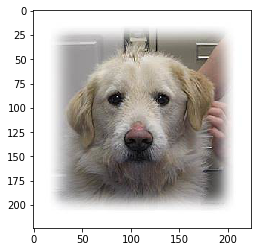

In [12]:
plt.imshow(image)

In [13]:
label

(u'n02099601', u'golden_retriever', 0.5450742)